# 1 Author

**Student Name**:  Diba Hadji Kazemi

**Student ID**:  230516614



# 2 Problem formulation

**Describe the machine learning problem that you want to solve and explain what's interesting about it.**

In this problem a picture will be given to the model which has either rice or chips. The model developed in this project should be able to correctly classify this image.

- One of the interesting fact about this project is that the data has been collected by ECS7020P class.

- This dataset is full of dishes from many cuisines and that makes it unique.

# 3 Machine Learning pipeline

***Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and format of the intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.***

the input of this pipeline is an image, then at first the image will be scaled to fit a square then its size will be set to 200x200 pixels. the resulting picture will be used for feature extraction where yellowness, correlation, and dissimilarity of a given gray-level co-occurrence matrix (GLCM) of the image are used. Finally, based on these extracted features the trained model is used to predict the result.

- Data transformation

  The input of this stage is an image.
  - scaling the image to a square.
  - change the size of the picture to a 200x200 image.
  - Extract 3 features from the image
    1. yellowness
    2. Correlation of gray-level co-occurrence matrix
    3. Dissimilarity of gray-level co-occurrence matrix

  the output of this stage is an array

- Model
  - the selected model in the training stage is used in this stage to make predictions based on the array created in the transformation stage.
  
  the output of this stage is the prediction

The function below can be used to identify the content of the dish and an image should be given to it as an input at the end of this code this function will be used.













In [ ]:
def rice_chips_predictor(I, model):
  I = scaling(I)
  I = resize_img(I,size=[200,200])
  plt.title('the scaled image')
  plt.imshow(I)
  # feature extraction
  f2,f3 = GMLC_features(I)
  x = [get_yellow_component(I), f2, f3]
  y = model.predict([x])
  if y==[1]:
    print('rice')
  else:
    print('chips')

# 4 Transformation stage

**Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.**

- Scale Images to square to make them the same shape
- make 200x200 images
- Extract 3 features from the image
  1. yellowness
  2. correlation of gray-level co-occurrence matrix
  3. dissimilarity of the gray-level co-occurrence matrix

- Creates a NumPy array containing the 4 audio features used as predictors (`X`) and a binary label (`y`), that indicates the name of the song.
- Input: Original Image
- Output: two NumPy arrays where `X` is the predictor containing the 4 audio features, `y` is the binary label that indicates whether the dish has rice or chips.

# 5 Modelling

**Describe the ML model(s) that you will build. Explain why you have chosen them.**

This dataset is skewed, therefore the chosen models should be fit to model such datasets. The models used in this project are:
- Random Forest Classifier
- Support vector machine
- gradient boosting
- Decision trees

# 6 Methodology

**Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc)**


In this project accuracy and confusion matrix have been used as a measure to choose the best fitting model.

The reason these two have been chosen is that when data is skewed accuracy may not be enough to choose the best fitting model. In those cases confusion matrix can help us have a better understanding of the model's performance.

# 7 Dataset

**Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.**

The dataset that has been used here is the full yummy dataset provided by MLEnd. As it can be seen from the columns of this csv file this database has no column indicating rice or chips. Moreover there are many dishes in this dataset that have neither rice nor chips.

The steps taken in this section are as followed:
- download data from the drive/ import
- add image file paths to the table
- filter data that have either rice or chips/fries in their ingredients or in their name and add a column of rice_chips to label data accordingly
- creating a dataset with only rice or chips datas
- seperating the dataset into train, test datasets according to the Benchmark_A column.

## Preprocessing

In [ ]:
pip install mlend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.1 MB/s eta 0:00:00


importing required libraries

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp
import cv2

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


this cell needs to be run the first time to download the data.

In [ ]:
import mlend
from mlend import download_yummy, yummy_load

subset = {}

datadir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd', subset = subset,verbose=1,overwrite=False)
os.listdir(datadir)
TrainSet, TestSet, MAPs = yummy_load(datadir_main = datadir,encode_labels=True,)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!
Total 3250 found in /content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
df.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train


In the following sections we want to first find dishes which contain rice or chips in the .csv file and later on use the images related to those data as the training and testing data. so we first add a column to our dataframe to story the paths to images in it.

In [ ]:
df['x_path'] = np.nan
train_indices = df[df['Benchmark_A'] == 'Train'].index
df.loc[train_indices, 'x_path'] = TrainSet['X_paths']
test_indices = df[df['Benchmark_A'] == 'Test'].index
df.loc[test_indices, 'x_path'] = TestSet['X_paths']

finding the data containing rice and labeling them

In [ ]:
rice = df[df['Dish_name'].str.contains('rice')|df['Ingredients'].str.contains('rice')]
rice['rice_chips'] = 'rice'
rice.head()

<ipython-input-7-517dc979e3cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,x_path,rice_chips
filename,,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,rice
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Test,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,rice
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Test,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,rice
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,rice
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,rice


finding chips dishes and labeling them accordingly

In [ ]:
chips = df[df['Dish_name'].str.contains('fries|chips')|df['Ingredients'].str.contains('fries|chips')]
chips['rice_chips'] = 'chips'
chips.head()

<ipython-input-8-6b7bded0999f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,x_path,rice_chips
filename,,,,,,,,,,,,,
000024.jpg,vegan,british,british,pie_and_chips,home,"mushroom_pie,chips,peas",neutral,3.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000096.jpg,non_vegetarian,english,english,"fish_burger,chips,onion_rings",home,"cod_fillets,panko_bread_crumbs,onions,potatoes...",unhealthy,2.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000107.jpg,vegetarian,english,english,sandwich_with_potatos_fries,home,"bread,potato,tomato,onion,spices,potato_fries",unhealthy,2.0,strongly_like,5.0,Test,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000138.jpg,vegetarian,english,english,banana_and_chocolate_chip_muffin,home,"chocolate_chips,self-raising_flour,caster_suga...",unhealthy,2.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000141.jpg,non_vegetarian,american,american,spicy_chicken_burger_meal,restaurant,"bun,lettuce,chicken_chops,french_fries,sloppy_...",unhealthy,2.0,strongly_like,5.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips


creating the final data set containing chips and rice data.

In [ ]:
df_f = pd.concat([chips, rice])
df = df[~(df['Dish_name']=='banana_and_chocolate_chip_muffin')]
df_f.head()

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A,x_path,rice_chips
filename,,,,,,,,,,,,,
000024.jpg,vegan,british,british,pie_and_chips,home,"mushroom_pie,chips,peas",neutral,3.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000096.jpg,non_vegetarian,english,english,"fish_burger,chips,onion_rings",home,"cod_fillets,panko_bread_crumbs,onions,potatoes...",unhealthy,2.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000107.jpg,vegetarian,english,english,sandwich_with_potatos_fries,home,"bread,potato,tomato,onion,spices,potato_fries",unhealthy,2.0,strongly_like,5.0,Test,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000138.jpg,vegetarian,english,english,banana_and_chocolate_chip_muffin,home,"chocolate_chips,self-raising_flour,caster_suga...",unhealthy,2.0,like,4.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips
000141.jpg,non_vegetarian,american,american,spicy_chicken_burger_meal,restaurant,"bun,lettuce,chicken_chops,french_fries,sloppy_...",unhealthy,2.0,strongly_like,5.0,Train,/content/drive/MyDrive/Data/MLEnd/yummy/MLEndY...,chips


seperating train and test data based on the 'Benchmark_A' column provided in the database.

In [ ]:
train = df_f[df_f['Benchmark_A']=='Train']
test = df_f[df_f['Benchmark_A']=='Test']


## Transformation

In order to create a unified set of images first we scale all the images so that they would all be a square. This has been achieved by scaling the picture based on it's smallest height or width value to create a square.

In [ ]:
def scaling(I):
  N, M, C = I.shape
  if N > M:
    return cv2.resize(I, (200, 200))
  else:
    return cv2.resize(I, (200, 200))
def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

X_train = []
for k,file in enumerate(train['x_path']):
  sp.utils.ProgBar_JL(k,len(train['x_path']),L=50,color='blue')
  I = plt.imread(file)
  I = scaling(I)
  # I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(test['x_path']):
  sp.utils.ProgBar_JL(k,len(test['x_path']),L=50,color='blue')
  I = plt.imread(file)
  I = scaling(I)
  # I = resize_img(I,size=[200,200])
  X_test.append(I)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train.shape, X_test.shape

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|653\653|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|297\297|
Done!


((653, 200, 200, 3), (297, 200, 200, 3))

In [ ]:
import shutil
np.save('/content/X_train.npy',X_train)
shutil.copy('/content/X_train.npy', '/content/drive/My Drive/Data/MLEnd/X_train.npy')

np.save('/content/X_test.npy',X_test)
shutil.copy('/content/X_test.npy', '/content/drive/My Drive/Data/MLEnd/X_test.npy')

'/content/drive/My Drive/Data/MLEnd/X_test.npy'

In [ ]:
X_train = np.load('/content/drive/My Drive/Data/MLEnd/X_train.npy')
X_test = np.load('/content/drive/My Drive/Data/MLEnd/X_test.npy')

plotting the first 15 images in the dataset that have been scaled.

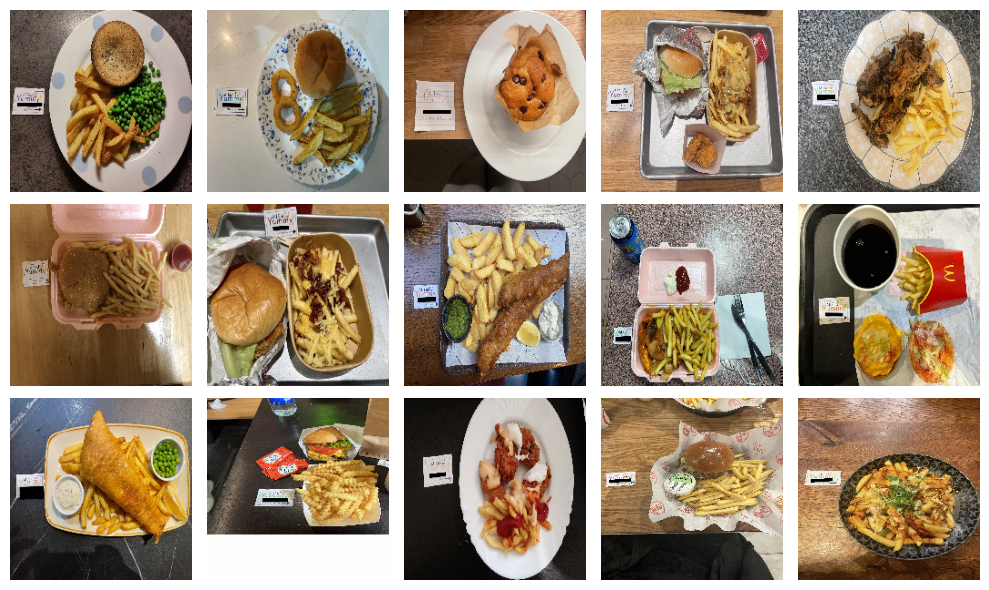

In [ ]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

## Data Extraction

the data extracted from the pixels of the images is it's yellowness. That is because in comparison with rice, potatoes have a more yellowish complexion and therefore this feature has been used to make predictions

In [ ]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)

  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Chips','Rice']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [ ]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

creating the test, train datasets extracted from functions above.

In [ ]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((653, 3), (297, 3))

normalizing the predictors.

In [ ]:
MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

Encoding the rice, chips label

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(['rice', 'chips'])
Y_train = label.transform(train['rice_chips'])
Y_test = label.transform(test['rice_chips'])

# 8 Results

Carry out your experiments here, explain your results.

## Modelling

### Random forest classifier

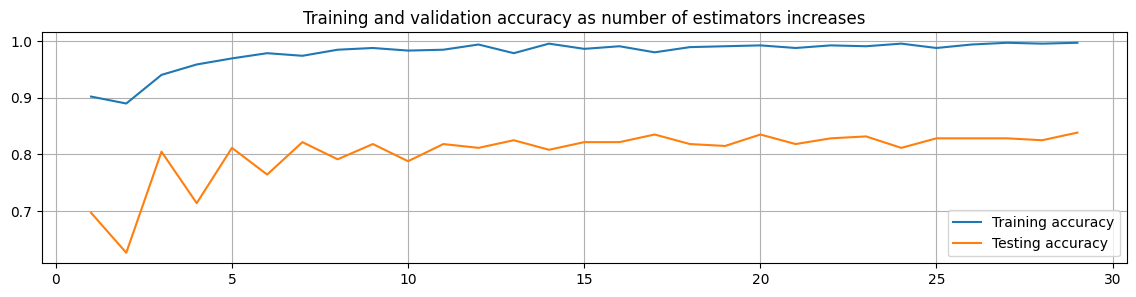

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Train_accuracy = []
Test_accuracy = []

for n in range(1,30):

  rfc = RandomForestClassifier(n_estimators=n)
  rfc.fit(X_train_fn, Y_train)

  Train_accuracy.append(rfc.score(X_train_fn, Y_train))
  Test_accuracy.append(rfc.score(X_test_fn, Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Test_accuracy, label = "Testing accuracy")
plt.legend()
plt.title('Training and validation accuracy as number of estimators increases')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_index_rfc = accuracy['test accuracy'].idxmax()
accuracy_rfc = accuracy.loc[max_index_rfc]


Training Accuracy:	 0.996937212863706
Test  Accuracy:	 0.835016835016835


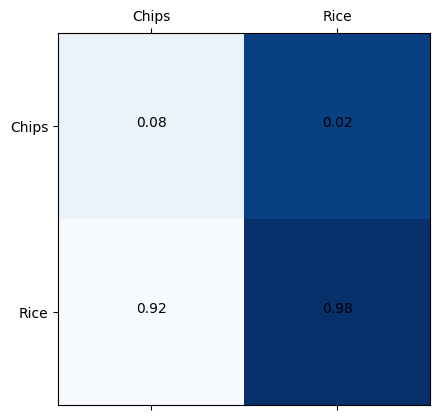

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=max_index_rfc+1)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

even though random forest classifier has a good accuracy but as it can be seen from the confusion matrix the model predicts the majority of data as rice. In addition if we look at the data distribution it's apparent that this data set is skewed and random forest classifier may not be an ideal classifier for this case.

### SVM

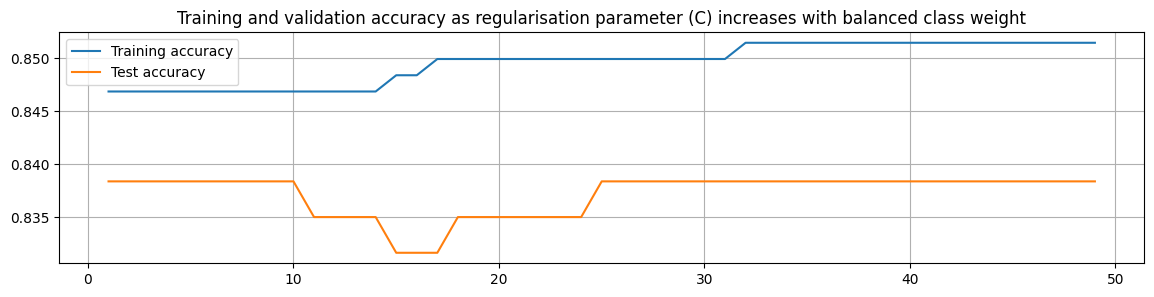

train accuracy    0.846861
test accuracy     0.838384
Name: 0, dtype: float64


In [ ]:
from sklearn import svm
Train_accuracy = []
Test_accuracy = []

for n in range(1,50):
    model = svm.SVC(C=n)
    model.fit(X_train_fn,Y_train)

    Train_accuracy.append(model.score(X_train_fn, Y_train))
    Test_accuracy.append(model.score(X_test_fn, Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Test_accuracy, label = "Test accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases with balanced class weight')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_index_svm = accuracy['test accuracy'].idxmax()
accuracy_svm = accuracy.iloc[max_index_svm]
print(accuracy_svm)

Training Accuracy:	 0.8514548238897397
Test  Accuracy:	 0.8383838383838383


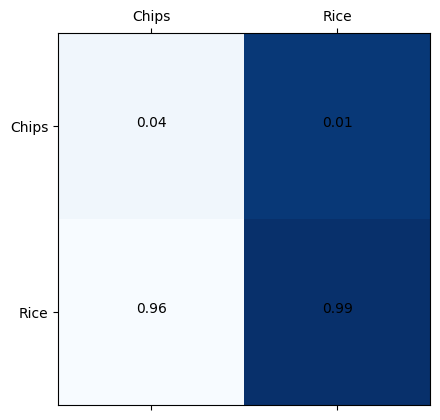

In [ ]:
model =  svm.SVC(C=40)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Same as random forest classifier, SVM despite having high accuracy for both train and test data sets shows low performance in the confusion matrix, which makes it an unfit model for our purpose.

In [ ]:
from sklearn import svm
Train_accuracy = []
Test_accuracy = []

for n in range(1,50):
    model = svm.SVC(C=n, class_weight='balanced')
    model.fit(X_train_fn,Y_train)

    Train_accuracy.append(model.score(X_train_fn, Y_train))
    Test_accuracy.append(model.score(X_test_fn, Y_test))

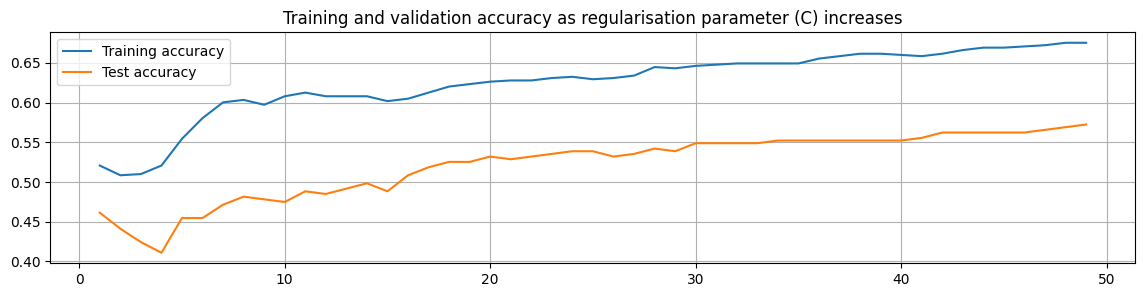

train accuracy    0.675345
test accuracy     0.572391
Name: 48, dtype: float64


In [ ]:

plt.figure(figsize=(14,3))
plt.plot(list(range(1,n+1)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(1,n+1)), Test_accuracy, label = "Test accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases with balanced class weight')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_index_svm = accuracy['test accuracy'].idxmax()
accuracy_svm = accuracy.iloc[max_index_svm]
print(accuracy_svm)

Training Accuracy:	 0.6753445635528331
Test  Accuracy:	 0.569023569023569


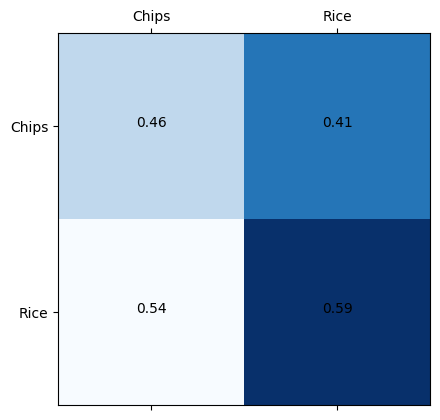

In [ ]:
model =  svm.SVC(C=max_index_svm, class_weight='balanced')
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Additionally, SVM can be employed with balanced class weights however this method also doesn't fit well also that's because we are using the colors of the images as a feature and chips and rice have similar coloring in some pictures.

### Decision Trees

Training Accuracy:	 0.996937212863706
Test  Accuracy:	 0.734006734006734


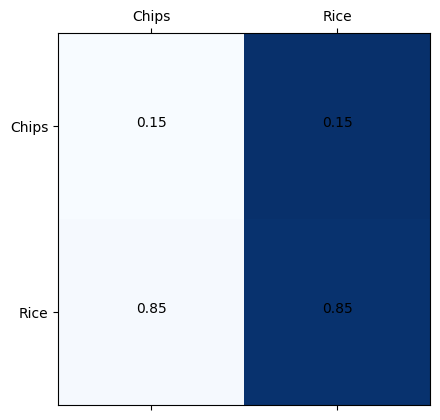

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Decision trees performance has been better considering its confusion matrix but in terms of accuracy, the test accuracy is low compared to train accuracy.

### Gradient boosting classidfier

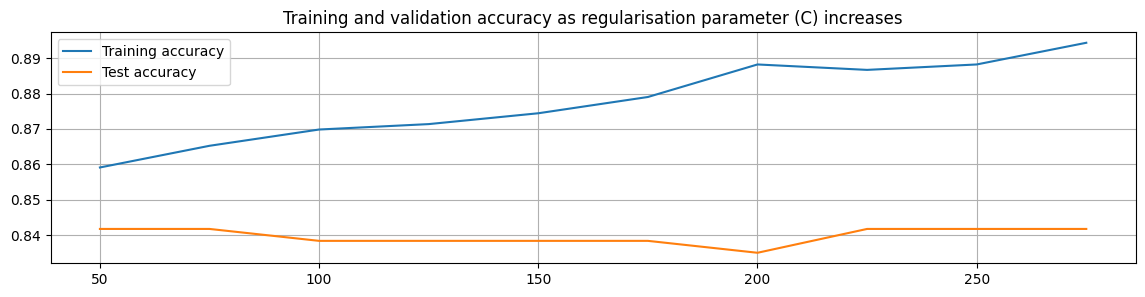

train accuracy    0.859112
test accuracy     0.841751
Name: 0, dtype: float64


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Train_accuracy = []
Test_accuracy = []

for n in range(50,300,25):
  model = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0, max_depth=1, random_state=0)
  model.fit(X_train_fn,Y_train)
  Train_accuracy.append(model.score(X_train_fn, Y_train))
  Test_accuracy.append(model.score(X_test_fn, Y_test))

plt.figure(figsize=(14,3))
plt.plot(list(range(50,300,25)), Train_accuracy, label = "Training accuracy")
plt.plot(list(range(50,300,25)), Test_accuracy, label = "Test accuracy")
plt.legend()
plt.title('Training and validation accuracy as regularisation parameter (C) increases')
plt.grid()
plt.show()
dic = {'train accuracy':Train_accuracy, 'test accuracy':Test_accuracy}
accuracy = pd.DataFrame(dic)
max_index_gbc = accuracy['test accuracy'].idxmax()
accuracy_gbc = accuracy.loc[max_index_gbc]
print(accuracy_gbc)


from this plot it can be seen that the number of estimators doesn't really affect the accuracy of the gradient boost.

Training Accuracy:	 0.888208269525268
Test  Accuracy:	 0.835016835016835


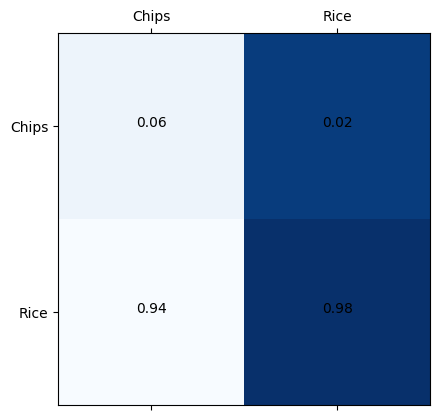

In [ ]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train_fn, Y_train)
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy)
print('Test  Accuracy:\t',test_accuracy)

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

Gradient boost has high values of accuracy but in terms of confusion matrix its results are not good.

# 9 Conclusions

Your conclusions, improvements, etc should go here

Table below shows the best validation accuracy achieved by each model:

| Model | Best test accuracy |
|-------|--------------------------|
|Decision tree|                0.73|
|Gradient boosting|         0.84|
|Random forest classifier|     0.84|
|Balanced SVM|                0.6|
|SVM|                         0.83|


- SVM, Random forest classifier, and gradient boosting have close test accuracies but, when it comes to their confusion matrices, all three don't perform very well because this dataset is highly skewed and the number of dishes containing rice is considerably more than the dishes containing chips. However, *the random forest classifier* performed better by having the highest correct predictions for chips.

- Additionally, the color analysis method used here could be improved in some ways because in both rice and chips dishes the images contain yellow therefore choosing yellowness as a feature could be improved by choosing a shape-based model which could be implemented by CNN and use of transfer learning.

rice


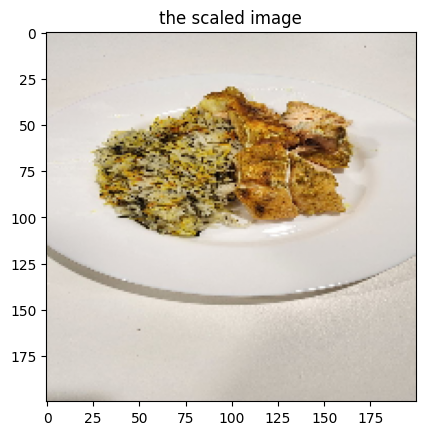

In [ ]:
model = RandomForestClassifier(n_estimators=max_index_rfc)
model.fit(X_train_fn, Y_train)
I = plt.imread('photo_2023-12-01_15-50-49.jpg')
rice_chips_predictor(I, model)